<a href="https://colab.research.google.com/github/gsf31/python_data/blob/main/analise-COVID19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

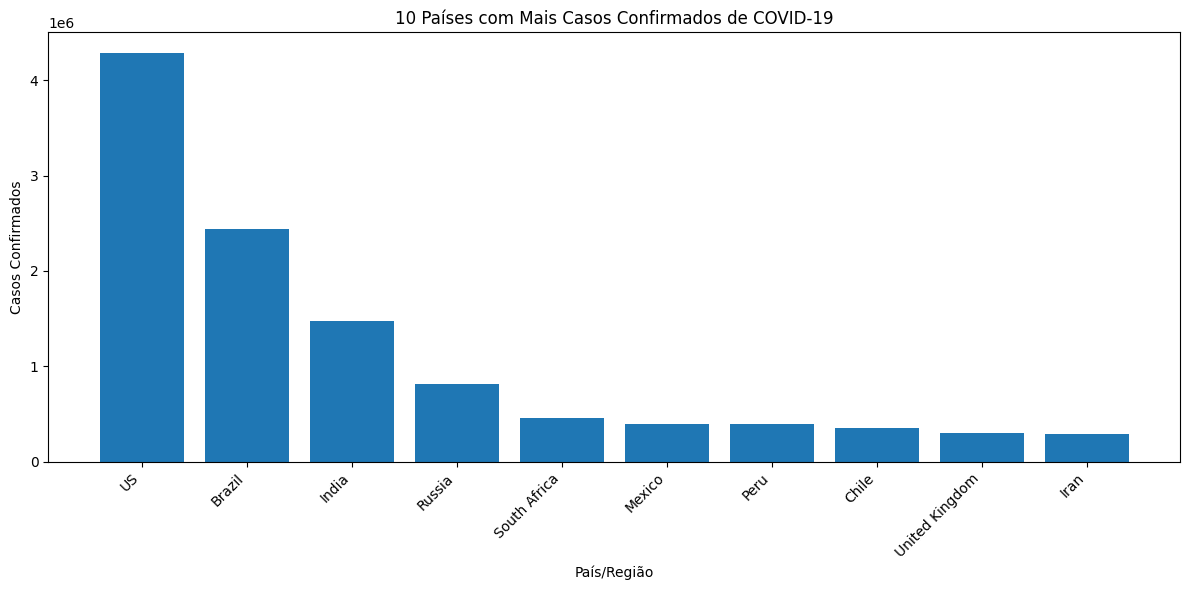

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('/content/dados_csv/country_wise_latest.csv')

#  Usando a coluna 'Confirmed' para o gráfico
df = df.sort_values('Confirmed', ascending=False).head(10)

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df['Country/Region'], df['Confirmed'])
plt.xlabel('País/Região')
plt.ylabel('Casos Confirmados')
plt.title('10 Países com Mais Casos Confirmados de COVID-19')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-13-0ca526197d52>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


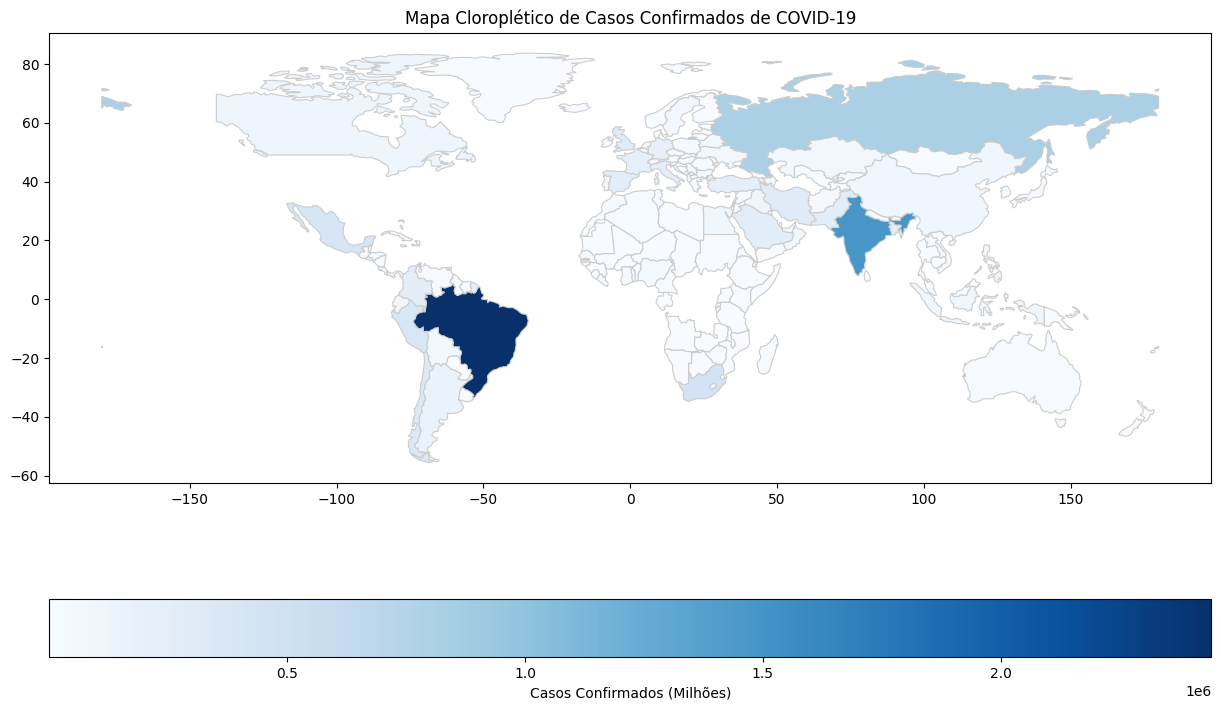

In [13]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar os dados do COVID-19
df = pd.read_csv('/content/dados_csv/country_wise_latest.csv')

# Carregar o arquivo GeoJSON com as fronteiras dos países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Renomear a coluna 'name' no GeoDataFrame para 'Country/Region' para fazer o merge
world = world.rename(columns={'name': 'Country/Region'})

# Fazer o merge dos dados do COVID-19 com o GeoDataFrame
merged_data = world.merge(df, on='Country/Region', how='left')

# Criar o mapa cloroplético
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Confirmed', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8',
                 legend=True, legend_kwds={'label': "Casos Confirmados (Milhões)",
                                            'orientation': "horizontal"})
# Ajustar a aparência da legenda (opcional)
plt.gcf().axes[1].tick_params(labelsize=10)  # Ajustar tamanho da fonte da legenda

# Adicionar título
plt.title('Mapa Cloroplético de Casos Confirmados de COVID-19')

# Mostrar o mapa
plt.show()

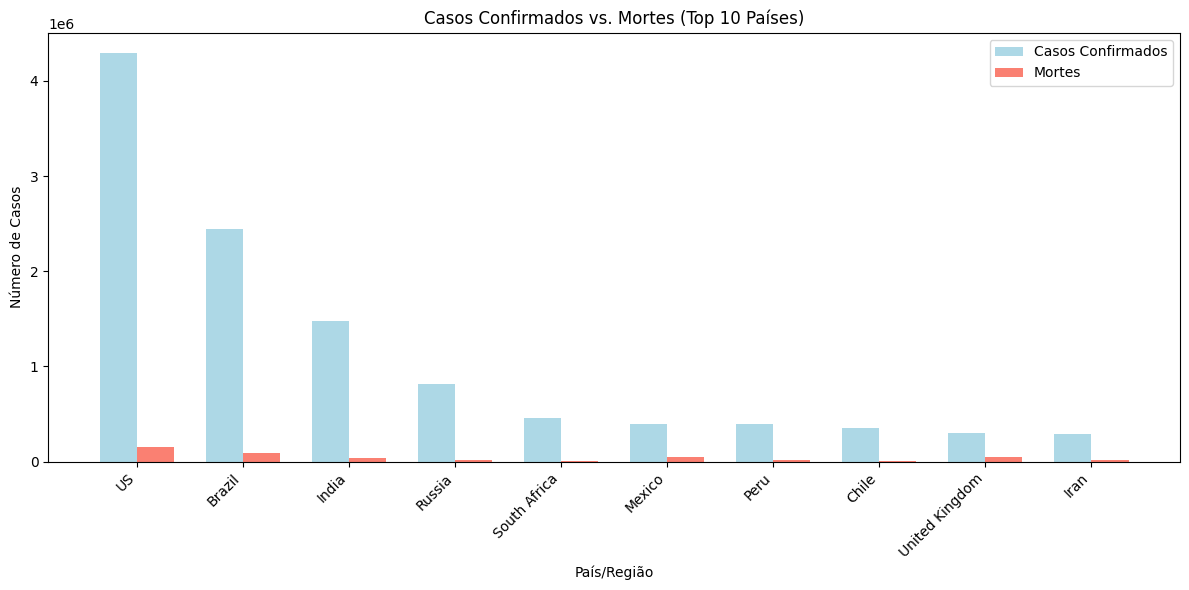

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (código para carregar os dados)

# Selecionar e ordenar os 10 países com mais casos confirmados
df_top10 = df.sort_values('Confirmed', ascending=False).head(10)

# Configurar o gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(df_top10))

plt.bar(index, df_top10['Confirmed'], bar_width, label='Casos Confirmados', color='lightblue')
plt.bar([i + bar_width for i in index], df_top10['Deaths'], bar_width, label='Mortes', color='salmon')

# Configurar os rótulos e título
plt.xlabel('País/Região')
plt.ylabel('Número de Casos')
plt.title('Casos Confirmados vs. Mortes (Top 10 Países)')
plt.xticks([i + bar_width/2 for i in index], df_top10['Country/Region'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-21-f13ebfc4ddf6>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


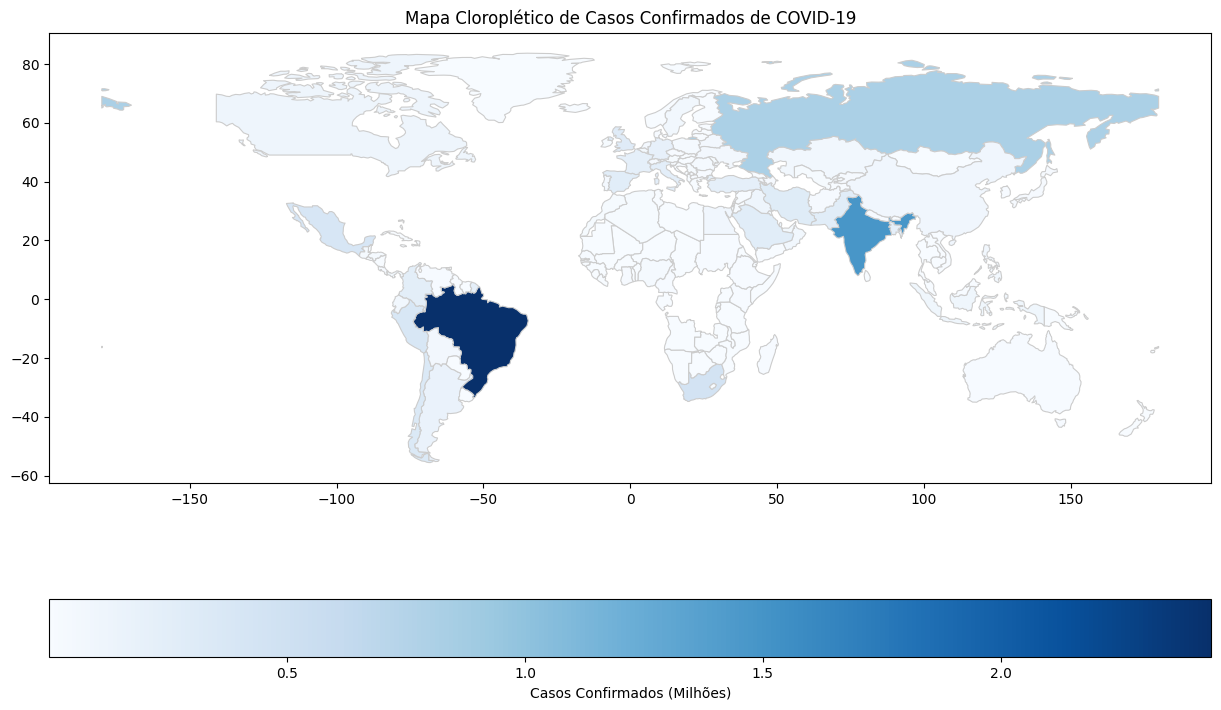

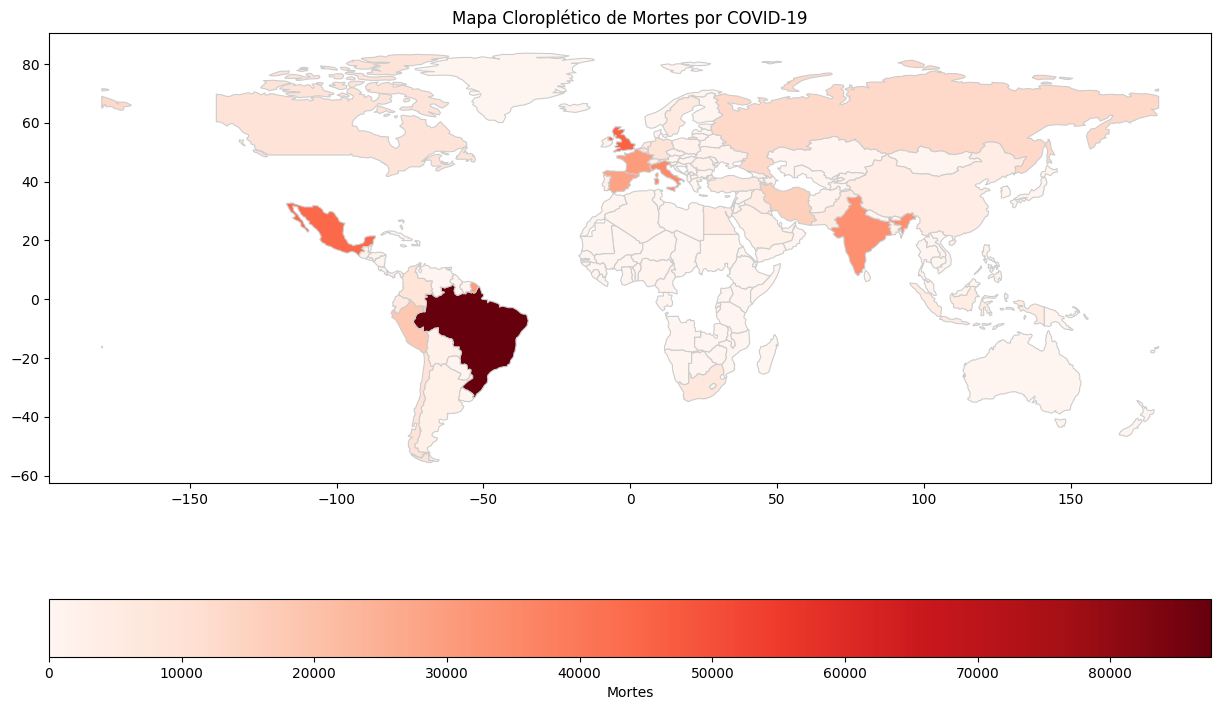

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar os dados do COVID-19
df = pd.read_csv('/content/dados_csv/country_wise_latest.csv')

# Carregar o arquivo GeoJSON com as fronteiras dos países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.rename(columns={'name': 'Country/Region'})

# Fazer o merge dos dados do COVID-19 com o GeoDataFrame
merged_data = world.merge(df, on='Country/Region', how='left')

# Mapa 1: Casos Confirmados (em milhões)
fig, ax1 = plt.subplots(1, 1, figsize=(15, 10))
merged_data['Confirmed_millions'] = merged_data['Confirmed'] / 1000000  # Criar coluna em milhões
merged_data.plot(column='Confirmed_millions', cmap='Blues', linewidth=0.8, ax=ax1,
                 edgecolor='0.8', legend=True,
                 legend_kwds={'label': "Casos Confirmados (Milhões)",
                              'orientation': "horizontal"})
ax1.set_title('Mapa Cloroplético de Casos Confirmados de COVID-19')

# Mapa 2: Mortes
fig, ax2 = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Deaths', cmap='Reds', linewidth=0.8, ax=ax2,
                 edgecolor='0.8', legend=True,
                 legend_kwds={'label': "Mortes", 'orientation': "horizontal"})
ax2.set_title('Mapa Cloroplético de Mortes por COVID-19')

plt.show()